
# Ex 4. Time-Lapse ERT Inversion Techniques

This example demonstrates different approaches for time-lapse electrical 
resistivity tomography (ERT) inversion using PyHydroGeophysX.

The example includes:
1. Full time-lapse inversion with temporal regularization
2. Windowed time-lapse inversion for large datasets
3. L1-norm regularized inversion for sharp boundary recovery
4. Comparison of different inversion strategies
5. Visualization of resistivity evolution over time

Time-lapse ERT inversion is crucial for monitoring subsurface water 
content changes and understanding hydrological processes in watersheds.
The temporal regularization helps maintain consistency between consecutive
time steps while allowing for realistic changes.


In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import pygimli as pg
from pygimli.physics import ert
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Setup package path for development
try:
    # For regular Python scripts
    current_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    # For Jupyter notebooks
    current_dir = os.getcwd()

# Add the parent directory to Python path
parent_dir = os.path.dirname(current_dir)
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

# Import PyHydroGeophysX modules
from PyHydroGeophysX.inversion.time_lapse import TimeLapseERTInversion
from PyHydroGeophysX.inversion.windowed import WindowedTimeLapseERTInversion

In [2]:
data_dir = "C:/Users/HChen8/Documents/GitHub/PyHydroGeophysX/examples/results/TL_measurements/appres"

# List of ERT data files testing monthly time-lapse inversion
ert_files = [
    "synthetic_data30.dat",
    "synthetic_data60.dat",
    "synthetic_data90.dat",
    "synthetic_data120.dat",
    "synthetic_data150.dat",
    "synthetic_data180.dat",
    "synthetic_data210.dat",
    "synthetic_data240.dat",
    "synthetic_data270.dat",
    "synthetic_data300.dat",
    "synthetic_data330.dat",
    "synthetic_data360.dat",
]

## 1.Full Time-Lapse Inversion



#################### FUll Time-Lapse Inversion #####################



In [3]:
# Full paths to data files
data_files = [os.path.join(data_dir, f) for f in ert_files]

# Measurement times (can be timestamps or any sequential numbers representing time)
measurement_times = [1, 2, 3, 4, 5, 6, 7 ,8, 9, 10, 11, 12]  # Adjust based on your actual acquisition times

# Create a mesh for the inversion (or load an existing one)
data = ert.load(data_files[0])
ert_manager = ert.ERTManager(data)
mesh = ert_manager.createMesh(data=data, quality=34)

# Set up inversion parameters
inversion_params = {
    "lambda_val": 50.0,              # Regularization parameter
    "alpha": 10.0,                   # Temporal regularization parameter
    "decay_rate": 0.0,               # Temporal decay rate
    "method": "cgls",                # Solver method ('cgls', 'lsqr', etc.)
    "model_constraints": (0.001, 1e4), # Min/max resistivity values (ohm-m)
    "max_iterations": 15,            # Maximum iterations
    "absoluteUError": 0.0,           # Absolute data error (V)
    "relativeError": 0.05,           # Relative data error (5%)
    "lambda_rate": 1.0,              # Lambda reduction rate
    "lambda_min": 1.0,               # Minimum lambda value
    "inversion_type": "L2"           # 'L1', 'L2', or 'L1L2'
}

# Create the time-lapse inversion object
inversion = TimeLapseERTInversion(
    data_files=data_files,
    measurement_times=measurement_times,
    mesh=mesh,
    **inversion_params
)

# Run the inversion
print("Starting time-lapse inversion...")
result = inversion.run()
print("Inversion complete!")

21/05/25 - 20:27:39 - pyGIMLi - INFO - Found 2 regions.


21/05/25 - 20:27:39 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


21/05/25 - 20:27:39 - pyGIMLi - INFO - Found 2 regions.


21/05/25 - 20:27:39 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


21/05/25 - 20:27:39 - pyGIMLi - INFO - Found 2 regions.


21/05/25 - 20:27:39 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


21/05/25 - 20:27:40 - pyGIMLi - INFO - Found 2 regions.


21/05/25 - 20:27:40 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


21/05/25 - 20:27:40 - pyGIMLi - INFO - Found 2 regions.


21/05/25 - 20:27:40 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


21/05/25 - 20:27:40 - pyGIMLi - INFO - Found 2 regions.


21/05/25 - 20:27:40 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


21/05/25 - 20:27:40 - pyGIMLi - INFO - Found 2 regions.


21/05/25 - 20:27:40 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


21/05/25 - 20:27:40 - pyGIMLi - INFO - Found 2 regions.


21/05/25 - 20:27:40 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


21/05/25 - 20:27:40 - pyGIMLi - INFO - Found 2 regions.


21/05/25 - 20:27:40 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


21/05/25 - 20:27:40 - pyGIMLi - INFO - Found 2 regions.


Starting time-lapse inversion...


21/05/25 - 20:27:40 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


21/05/25 - 20:27:40 - pyGIMLi - INFO - Found 2 regions.


21/05/25 - 20:27:40 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


21/05/25 - 20:27:40 - pyGIMLi - INFO - Found 2 regions.


21/05/25 - 20:27:40 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


21/05/25 - 20:27:40 - pyGIMLi - INFO - Found 2 regions.


21/05/25 - 20:27:40 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


21/05/25 - 20:27:40 - pyGIMLi - INFO - Creating forward mesh from region infos.


21/05/25 - 20:27:40 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


21/05/25 - 20:27:40 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


21/05/25 - 20:27:53 - pyGIMLi - INFO - Creating forward mesh from region infos.


21/05/25 - 20:27:53 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


21/05/25 - 20:27:53 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


21/05/25 - 20:28:04 - pyGIMLi - INFO - Creating forward mesh from region infos.


21/05/25 - 20:28:04 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


21/05/25 - 20:28:04 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


21/05/25 - 20:28:15 - pyGIMLi - INFO - Creating forward mesh from region infos.


21/05/25 - 20:28:15 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


21/05/25 - 20:28:15 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


21/05/25 - 20:28:26 - pyGIMLi - INFO - Creating forward mesh from region infos.


21/05/25 - 20:28:26 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


21/05/25 - 20:28:26 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


21/05/25 - 20:28:36 - pyGIMLi - INFO - Creating forward mesh from region infos.


21/05/25 - 20:28:36 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


21/05/25 - 20:28:36 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


21/05/25 - 20:28:48 - pyGIMLi - INFO - Creating forward mesh from region infos.


21/05/25 - 20:28:48 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


21/05/25 - 20:28:48 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


21/05/25 - 20:28:58 - pyGIMLi - INFO - Creating forward mesh from region infos.


21/05/25 - 20:28:58 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


21/05/25 - 20:28:59 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


21/05/25 - 20:29:10 - pyGIMLi - INFO - Creating forward mesh from region infos.


21/05/25 - 20:29:10 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


21/05/25 - 20:29:10 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


21/05/25 - 20:29:22 - pyGIMLi - INFO - Creating forward mesh from region infos.


21/05/25 - 20:29:22 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


21/05/25 - 20:29:22 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


21/05/25 - 20:29:33 - pyGIMLi - INFO - Creating forward mesh from region infos.


21/05/25 - 20:29:34 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


21/05/25 - 20:29:34 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


21/05/25 - 20:29:45 - pyGIMLi - INFO - Creating forward mesh from region infos.


21/05/25 - 20:29:45 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


21/05/25 - 20:29:45 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


ERT chi2: 2345.302026235805
dPhi: 1.0
ERTphi_d: 23302920.932678957, ERTphi_m: 0.0, ERTphi_t: 0.0


-------------------ERT Iteration: 1 ---------------------------


ERT chi2: 67.58006008703794
dPhi: 0.9711849223123286
ERTphi_d: 671475.4770248089, ERTphi_m: 18389.801466837653, ERTphi_t: 7058.1224563629385


-------------------ERT Iteration: 2 ---------------------------


ERT chi2: 5.249341265824442
dPhi: 0.9223241107056772
ERTphi_d: 52157.45481723166, ERTphi_m: 7683.614273004021, ERTphi_t: 6979.3120736215815


-------------------ERT Iteration: 3 ---------------------------


ERT chi2: 1.5978977693396748
dPhi: 0.6956003261318323
ERTphi_d: 15876.712236159008, ERTphi_m: 6949.92479738735, ERTphi_t: 6957.589083207056


-------------------ERT Iteration: 4 ---------------------------


ERT chi2: 1.5612046525143453
dPhi: 0.022963369452911116
ERTphi_d: 15512.129427382535, ERTphi_m: 6969.761274421108, ERTphi_t: 6915.711396879053


-------------------ERT Iteration: 5 ---------------------------


ERT chi2: 1.5472972271278607
dPhi: 0.008908137292626218
ERTphi_d: 15373.945248742424, ERTphi_m: 6896.937830095822, ERTphi_t: 6922.448457740529


-------------------ERT Iteration: 6 ---------------------------


ERT chi2: 1.5484352568911548
dPhi: 0.0007354952515533035
ERTphi_d: 15385.252712470514, ERTphi_m: 6878.643982034785, ERTphi_t: 6925.309899825454
Convergence reached at iteration 6


End of inversion
Inversion complete!


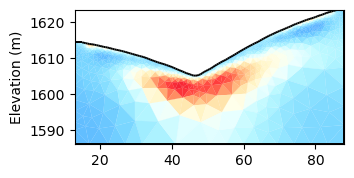

<Figure size 640x480 with 0 Axes>

In [4]:
from palettable.lightbartlein.diverging import BlueDarkRed18_18
fixed_cmap = BlueDarkRed18_18.mpl_colormap

fig = plt.figure(figsize=[16,6])

# True resistivity model
for i in range(12):
    ax = fig.add_subplot(3,4,i+1)
    ax, cbar = pg.show(result.mesh,result.final_models[:,i],pad=0.3,orientation="vertical",cMap=fixed_cmap,cMin= 100,cMax = 3000
                    , ylabel="Elevation (m)",label=' Resistivity ($\Omega$ m)',ax=ax,logScale=False,coverage=result.all_coverage[i]>-1)
    cbar.remove()

## 2. Window time-lapse inversion



Measurement times (can be timestamps or any sequential numbers representing time)



In [5]:
measurement_times = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]  # Adjust based on your actual acquisition times

# Create a mesh for the inversion (or load an existing one)
data = ert.load(os.path.join(data_dir, ert_files[0]))
ert_manager = ert.ERTManager(data)
mesh = ert_manager.createMesh(data=data, quality=34)

# Set up inversion parameters
inversion_params = {
    "lambda_val": 10.0,              # Regularization parameter
    "alpha": 10.0,                   # Temporal regularization parameter
    "decay_rate": 0.0,               # Temporal decay rate
    "method": "cgls",                # Solver method ('cgls', 'lsqr', etc.)
    "model_constraints": (0.001, 1e4), # Min/max resistivity values (ohm-m)
    "max_iterations": 15,            # Maximum iterations
    "absoluteUError": 0.0,           # Absolute data error (V)
    "relativeError": 0.05,           # Relative data error (5%)
    "lambda_rate": 1.0,              # Lambda reduction rate
    "lambda_min": 1.0,               # Minimum lambda value
    "inversion_type": "L2"           # 'L1', 'L2', or 'L1L2'
}

# Define the window size (number of timesteps to process together)
window_size = 3  # A window size of 3 means each window includes 3 consecutive measurements

# Create the windowed time-lapse inversion object
inversion = WindowedTimeLapseERTInversion(
    data_dir=data_dir,               # Directory containing ERT data files
    ert_files=ert_files,             # List of ERT data filenames
    measurement_times=measurement_times,  # List of measurement times
    window_size=window_size,         # Size of sliding window
    mesh=mesh,                       # Mesh for inversion
    **inversion_params               # Pass the same inversion parameters
)

# Run the inversion, optionally in parallel
print("Starting windowed time-lapse inversion...")
result = inversion.run()
print("Inversion complete!")

21/05/25 - 20:57:53 - pyGIMLi - INFO - Found 2 regions.


21/05/25 - 20:57:53 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


Starting windowed time-lapse inversion...

Processing 10 windows sequentially...
Using L2 inversion

Starting L2 inversion for window 0


21/05/25 - 20:57:55 - pyGIMLi - INFO - Found 2 regions.


21/05/25 - 20:57:55 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


21/05/25 - 20:57:55 - pyGIMLi - INFO - Found 2 regions.


21/05/25 - 20:57:55 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


21/05/25 - 20:57:55 - pyGIMLi - INFO - Found 2 regions.


21/05/25 - 20:57:55 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


21/05/25 - 20:57:55 - pyGIMLi - INFO - Creating forward mesh from region infos.


21/05/25 - 20:57:55 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


21/05/25 - 20:57:55 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


21/05/25 - 20:58:07 - pyGIMLi - INFO - Creating forward mesh from region infos.


21/05/25 - 20:58:07 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


21/05/25 - 20:58:07 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


21/05/25 - 20:58:18 - pyGIMLi - INFO - Creating forward mesh from region infos.


21/05/25 - 20:58:18 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


21/05/25 - 20:58:18 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


ERT chi2: 2614.857697445681
dPhi: 1.0
ERTphi_d: 6495306.520455072, ERTphi_m: 0.0, ERTphi_t: 0.0


-------------------ERT Iteration: 1 ---------------------------


ERT chi2: 57.160822854762074
dPhi: 0.9781399871547123
ERTphi_d: 141987.483971229, ERTphi_m: 2133.0318048019535, ERTphi_t: 2019.3263345496155


-------------------ERT Iteration: 2 ---------------------------


ERT chi2: 22.5559050024808
dPhi: 0.6053957260238835
ERTphi_d: 56028.86802616231, ERTphi_m: 1094.554819921153, ERTphi_t: 1990.3640206520934


-------------------ERT Iteration: 3 ---------------------------


ERT chi2: 10.93234978885349
dPhi: 0.5153220503610428
ERTphi_d: 27155.956875512067, ERTphi_m: 777.9876404621202, ERTphi_t: 2016.1820720941441


-------------------ERT Iteration: 4 ---------------------------


ERT chi2: 1.4113977529178923
dPhi: 0.8708971282315775
ERTphi_d: 3505.912018248044, ERTphi_m: 824.8517278512549, ERTphi_t: 2007.16812649131
Convergence reached at iteration 4


End of inversion

Window 0 results:
Model shape: (1364, 3)
Coverage available: True
Number of iterations: 5



Starting L2 inversion for window 1

21/05/25 - 21:00:17 - pyGIMLi - INFO - Found 2 regions.


21/05/25 - 21:00:17 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


21/05/25 - 21:00:17 - pyGIMLi - INFO - Found 2 regions.


21/05/25 - 21:00:17 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


21/05/25 - 21:00:17 - pyGIMLi - INFO - Found 2 regions.


21/05/25 - 21:00:17 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


21/05/25 - 21:00:17 - pyGIMLi - INFO - Creating forward mesh from region infos.


21/05/25 - 21:00:17 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


21/05/25 - 21:00:17 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


21/05/25 - 21:00:28 - pyGIMLi - INFO - Creating forward mesh from region infos.


21/05/25 - 21:00:28 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


21/05/25 - 21:00:28 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


21/05/25 - 21:00:40 - pyGIMLi - INFO - Creating forward mesh from region infos.


21/05/25 - 21:00:40 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


21/05/25 - 21:00:40 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


ERT chi2: 2424.799586453877
dPhi: 1.0
ERTphi_d: 6023202.17275143, ERTphi_m: 0.0, ERTphi_t: 0.0


-------------------ERT Iteration: 1 ---------------------------


ERT chi2: 49.16139134926216
dPhi: 0.9797255857251455
ERTphi_d: 122116.89611156721, ERTphi_m: 2030.4052077341905, ERTphi_t: 201.63423171606985


-------------------ERT Iteration: 2 ---------------------------


ERT chi2: 24.910144813411655
dPhi: 0.4932986205284542
ERTphi_d: 61876.79971651455, ERTphi_m: 1047.2940110993488, ERTphi_t: 196.05401052271043


-------------------ERT Iteration: 3 ---------------------------


ERT chi2: 10.835302193046617
dPhi: 0.5650245201620475
ERTphi_d: 26914.890647527798, ERTphi_m: 683.3698488251932, ERTphi_t: 185.19222054799386


-------------------ERT Iteration: 4 ---------------------------


ERT chi2: 1.22130693767545
dPhi: 0.8872844600071048
ERTphi_d: 3033.7264331858178, ERTphi_m: 749.3247578214018, ERTphi_t: 185.18664347561526
Convergence reached at iteration 4


End of inversion

Window 1 results:
Model shape: (1364, 3)
Coverage available: True
Number of iterations: 5



Starting L2 inversion for window 2


21/05/25 - 21:02:39 - pyGIMLi - INFO - Found 2 regions.


21/05/25 - 21:02:39 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


21/05/25 - 21:02:39 - pyGIMLi - INFO - Found 2 regions.


21/05/25 - 21:02:39 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


21/05/25 - 21:02:39 - pyGIMLi - INFO - Found 2 regions.


21/05/25 - 21:02:39 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


21/05/25 - 21:02:39 - pyGIMLi - INFO - Creating forward mesh from region infos.


21/05/25 - 21:02:40 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


21/05/25 - 21:02:40 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


21/05/25 - 21:02:51 - pyGIMLi - INFO - Creating forward mesh from region infos.


21/05/25 - 21:02:51 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


21/05/25 - 21:02:51 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


21/05/25 - 21:03:02 - pyGIMLi - INFO - Creating forward mesh from region infos.


21/05/25 - 21:03:02 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


21/05/25 - 21:03:02 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


ERT chi2: 2361.2976889094757
dPhi: 1.0
ERTphi_d: 5865463.459251137, ERTphi_m: 0.0, ERTphi_t: 0.0


-------------------ERT Iteration: 1 ---------------------------


ERT chi2: 46.75029981949603
dPhi: 0.9802014375234972
ERTphi_d: 116127.74475162814, ERTphi_m: 2035.1878124690538, ERTphi_t: 271.57952472761366


-------------------ERT Iteration: 2 ---------------------------


ERT chi2: 25.435103554989993
dPhi: 0.45593710300906076
ERTphi_d: 63180.79723059514, ERTphi_m: 1048.254653259394, ERTphi_t: 268.2720083403043


-------------------ERT Iteration: 3 ---------------------------


ERT chi2: 10.64557045912238
dPhi: 0.5814614854581995
ERTphi_d: 26443.59702045999, ERTphi_m: 704.7354551620707, ERTphi_t: 261.15373598163785


-------------------ERT Iteration: 4 ---------------------------


ERT chi2: 1.3260081864659068
dPhi: 0.8754403823113465
ERTphi_d: 3293.8043351813126, ERTphi_m: 767.1260349340936, ERTphi_t: 258.7736198644549
Convergence reached at iteration 4


End of inversion

Window 2 results:
Model shape: (1364, 3)
Coverage available: True
Number of iterations: 5



Starting L2 inversion for window 3


21/05/25 - 21:05:04 - pyGIMLi - INFO - Found 2 regions.


21/05/25 - 21:05:04 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


21/05/25 - 21:05:04 - pyGIMLi - INFO - Found 2 regions.


21/05/25 - 21:05:04 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


21/05/25 - 21:05:04 - pyGIMLi - INFO - Found 2 regions.


21/05/25 - 21:05:04 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


21/05/25 - 21:05:04 - pyGIMLi - INFO - Creating forward mesh from region infos.


21/05/25 - 21:05:04 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


21/05/25 - 21:05:04 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


21/05/25 - 21:05:15 - pyGIMLi - INFO - Creating forward mesh from region infos.


21/05/25 - 21:05:15 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


21/05/25 - 21:05:15 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


21/05/25 - 21:05:26 - pyGIMLi - INFO - Creating forward mesh from region infos.


21/05/25 - 21:05:26 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


21/05/25 - 21:05:27 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


ERT chi2: 2335.406380855519
dPhi: 1.0
ERTphi_d: 5801149.450045109, ERTphi_m: 0.0, ERTphi_t: 0.0


-------------------ERT Iteration: 1 ---------------------------


ERT chi2: 46.5597236215913
dPhi: 0.9800635452556504
ERTphi_d: 115654.35347603279, ERTphi_m: 2016.015741931199, ERTphi_t: 246.03647391482568


-------------------ERT Iteration: 2 ---------------------------


ERT chi2: 25.850587064996954
dPhi: 0.4447865009875365
ERTphi_d: 64212.85826945244, ERTphi_m: 1001.7087032383773, ERTphi_t: 247.26614204138738


-------------------ERT Iteration: 3 ---------------------------


ERT chi2: 10.735076687736347
dPhi: 0.5847260001970245
ERTphi_d: 26665.930492337087, ERTphi_m: 672.1091169859284, ERTphi_t: 239.37198888270922


-------------------ERT Iteration: 4 ---------------------------


ERT chi2: 1.3377465662208168
dPhi: 0.8753854671807751
ERTphi_d: 3322.962470492509, ERTphi_m: 720.2482587956681, ERTphi_t: 238.76735843373623
Convergence reached at iteration 4


End of inversion

Window 3 results:
Model shape: (1364, 3)
Coverage available: True
Number of iterations: 5



Starting L2 inversion for window 4


21/05/25 - 21:07:30 - pyGIMLi - INFO - Found 2 regions.


21/05/25 - 21:07:30 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


21/05/25 - 21:07:30 - pyGIMLi - INFO - Found 2 regions.


21/05/25 - 21:07:30 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


21/05/25 - 21:07:30 - pyGIMLi - INFO - Found 2 regions.


21/05/25 - 21:07:30 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


21/05/25 - 21:07:30 - pyGIMLi - INFO - Creating forward mesh from region infos.


21/05/25 - 21:07:30 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


21/05/25 - 21:07:30 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


21/05/25 - 21:07:42 - pyGIMLi - INFO - Creating forward mesh from region infos.


21/05/25 - 21:07:42 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


21/05/25 - 21:07:42 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


21/05/25 - 21:07:54 - pyGIMLi - INFO - Creating forward mesh from region infos.


21/05/25 - 21:07:54 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


21/05/25 - 21:07:54 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


ERT chi2: 2119.5610754349227
dPhi: 1.0
ERTphi_d: 5264989.711380348, ERTphi_m: 0.0, ERTphi_t: 0.0


-------------------ERT Iteration: 1 ---------------------------


ERT chi2: 43.20291751859596
dPhi: 0.9796170452367216
ERTphi_d: 107316.04711619236, ERTphi_m: 2036.5768303597151, ERTphi_t: 1915.37248925436


-------------------ERT Iteration: 2 ---------------------------


ERT chi2: 24.881678081152344
dPhi: 0.4240741248448684
ERTphi_d: 61806.088353582425, ERTphi_m: 1012.9375323042369, ERTphi_t: 1886.9679158024605


-------------------ERT Iteration: 3 ---------------------------


ERT chi2: 9.430281370400127
dPhi: 0.6209949610455139
ERTphi_d: 23424.818924073916, ERTphi_m: 734.9429172468909, ERTphi_t: 1888.499730727261


-------------------ERT Iteration: 4 ---------------------------


ERT chi2: 1.505409131576961
dPhi: 0.8403643462535322
ERTphi_d: 3739.4362828371713, ERTphi_m: 768.7434977977324, ERTphi_t: 1875.510582969049


-------------------ERT Iteration: 5 ---------------------------


ERT chi2: 1.16362436373553
dPhi: 0.22703779369492824
ERTphi_d: 2890.4429195190564, ERTphi_m: 743.8215744720997, ERTphi_t: 1869.4030143021737
Convergence reached at iteration 5


End of inversion

Window 4 results:
Model shape: (1364, 3)
Coverage available: True
Number of iterations: 6



Starting L2 inversion for window 5


21/05/25 - 21:10:30 - pyGIMLi - INFO - Found 2 regions.


21/05/25 - 21:10:30 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


21/05/25 - 21:10:30 - pyGIMLi - INFO - Found 2 regions.


21/05/25 - 21:10:30 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


21/05/25 - 21:10:30 - pyGIMLi - INFO - Found 2 regions.


21/05/25 - 21:10:30 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


21/05/25 - 21:10:30 - pyGIMLi - INFO - Creating forward mesh from region infos.


21/05/25 - 21:10:30 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


21/05/25 - 21:10:30 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


21/05/25 - 21:10:42 - pyGIMLi - INFO - Creating forward mesh from region infos.


21/05/25 - 21:10:43 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


21/05/25 - 21:10:43 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


21/05/25 - 21:10:54 - pyGIMLi - INFO - Creating forward mesh from region infos.


21/05/25 - 21:10:54 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


21/05/25 - 21:10:55 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


ERT chi2: 1950.723115414603
dPhi: 1.0
ERTphi_d: 4845596.218689874, ERTphi_m: 0.0, ERTphi_t: 0.0


-------------------ERT Iteration: 1 ---------------------------


ERT chi2: 41.5311151016256
dPhi: 0.9787098872344071
ERTphi_d: 103163.28991243799, ERTphi_m: 2021.1312703761428, ERTphi_t: 1928.3679862101267


-------------------ERT Iteration: 2 ---------------------------


ERT chi2: 23.365449079343
dPhi: 0.43739894721901085
ERTphi_d: 58039.77551308802, ERTphi_m: 1051.950145308148, ERTphi_t: 1907.4403618774104


-------------------ERT Iteration: 3 ---------------------------


ERT chi2: 8.185892839306456
dPhi: 0.6496582277742966
ERTphi_d: 20333.757812837237, ERTphi_m: 756.3417468137743, ERTphi_t: 1917.9946338761226


-------------------ERT Iteration: 4 ---------------------------


ERT chi2: 1.4235535495625309
dPhi: 0.8260967279308851
ERTphi_d: 3536.107017113327, ERTphi_m: 788.4123345829856, ERTphi_t: 1902.322738170944
Convergence reached at iteration 4


End of inversion

Window 5 results:
Model shape: (1364, 3)
Coverage available: True
Number of iterations: 5



Starting L2 inversion for window 6


21/05/25 - 21:12:59 - pyGIMLi - INFO - Found 2 regions.


21/05/25 - 21:12:59 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


21/05/25 - 21:12:59 - pyGIMLi - INFO - Found 2 regions.


21/05/25 - 21:12:59 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


21/05/25 - 21:12:59 - pyGIMLi - INFO - Found 2 regions.


21/05/25 - 21:12:59 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


21/05/25 - 21:12:59 - pyGIMLi - INFO - Creating forward mesh from region infos.


21/05/25 - 21:12:59 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


21/05/25 - 21:12:59 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


21/05/25 - 21:13:11 - pyGIMLi - INFO - Creating forward mesh from region infos.


21/05/25 - 21:13:11 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


21/05/25 - 21:13:11 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


21/05/25 - 21:13:23 - pyGIMLi - INFO - Creating forward mesh from region infos.


21/05/25 - 21:13:23 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


21/05/25 - 21:13:23 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


ERT chi2: 1883.650824187547
dPhi: 1.0
ERTphi_d: 4678988.6472818665, ERTphi_m: 0.0, ERTphi_t: 0.0


-------------------ERT Iteration: 1 ---------------------------


ERT chi2: 44.8441717897107
dPhi: 0.9761929487069065
ERTphi_d: 111392.92272564137, ERTphi_m: 1953.137379102482, ERTphi_t: 1358.1155475859264


-------------------ERT Iteration: 2 ---------------------------


ERT chi2: 22.49565669472998
dPhi: 0.4983594122282015
ERTphi_d: 55879.211229709275, ERTphi_m: 1037.733157708544, ERTphi_t: 1330.4523961479094


-------------------ERT Iteration: 3 ---------------------------


ERT chi2: 7.983695655985736
dPhi: 0.645100573665135
ERTphi_d: 19831.500009468567, ERTphi_m: 725.5732770299685, ERTphi_t: 1345.251689065018


-------------------ERT Iteration: 4 ---------------------------


ERT chi2: 1.3677334239420045
dPhi: 0.8286841729849067
ERTphi_d: 3397.4498250719394, ERTphi_m: 765.6539439079941, ERTphi_t: 1334.413910441236
Convergence reached at iteration 4


End of inversion

Window 6 results:
Model shape: (1364, 3)
Coverage available: True
Number of iterations: 5



Starting L2 inversion for window 7


21/05/25 - 21:15:27 - pyGIMLi - INFO - Found 2 regions.


21/05/25 - 21:15:27 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


21/05/25 - 21:15:27 - pyGIMLi - INFO - Found 2 regions.


21/05/25 - 21:15:27 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


21/05/25 - 21:15:27 - pyGIMLi - INFO - Found 2 regions.


21/05/25 - 21:15:27 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


21/05/25 - 21:15:27 - pyGIMLi - INFO - Creating forward mesh from region infos.


21/05/25 - 21:15:27 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


21/05/25 - 21:15:27 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


21/05/25 - 21:15:39 - pyGIMLi - INFO - Creating forward mesh from region infos.


21/05/25 - 21:15:39 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


21/05/25 - 21:15:39 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


21/05/25 - 21:15:50 - pyGIMLi - INFO - Creating forward mesh from region infos.


21/05/25 - 21:15:50 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


21/05/25 - 21:15:51 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


ERT chi2: 2080.9823041318746
dPhi: 1.0
ERTphi_d: 5169160.043463577, ERTphi_m: 0.0, ERTphi_t: 0.0


-------------------ERT Iteration: 1 ---------------------------


ERT chi2: 53.04267408598115
dPhi: 0.9745107519748425
ERTphi_d: 131758.00242957717, ERTphi_m: 1898.428054330393, ERTphi_t: 1438.1404081795172


-------------------ERT Iteration: 2 ---------------------------


ERT chi2: 20.8922225218627
dPhi: 0.606124259723467
ERTphi_d: 51896.28074430695, ERTphi_m: 999.1936735777955, ERTphi_t: 1402.6905816104095


-------------------ERT Iteration: 3 ---------------------------


ERT chi2: 8.494173189447112
dPhi: 0.5934289336350705
ERTphi_d: 21099.52620258663, ERTphi_m: 668.7458268131957, ERTphi_t: 1397.513416267857


-------------------ERT Iteration: 4 ---------------------------


ERT chi2: 1.3289137089547158
dPhi: 0.843549963096383
ERTphi_d: 3301.021653043514, ERTphi_m: 719.3894984509345, ERTphi_t: 1387.9229226638402
Convergence reached at iteration 4


End of inversion

Window 7 results:
Model shape: (1364, 3)
Coverage available: True
Number of iterations: 5



Starting L2 inversion for window 8

21/05/25 - 21:17:54 - pyGIMLi - INFO - Found 2 regions.


21/05/25 - 21:17:54 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


21/05/25 - 21:17:54 - pyGIMLi - INFO - Found 2 regions.


21/05/25 - 21:17:54 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


21/05/25 - 21:17:54 - pyGIMLi - INFO - Found 2 regions.


21/05/25 - 21:17:54 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


21/05/25 - 21:17:54 - pyGIMLi - INFO - Creating forward mesh from region infos.


21/05/25 - 21:17:54 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


21/05/25 - 21:17:54 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


21/05/25 - 21:18:06 - pyGIMLi - INFO - Creating forward mesh from region infos.


21/05/25 - 21:18:06 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


21/05/25 - 21:18:06 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


21/05/25 - 21:18:17 - pyGIMLi - INFO - Creating forward mesh from region infos.


21/05/25 - 21:18:17 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


21/05/25 - 21:18:17 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


ERT chi2: 2339.9500473783282
dPhi: 1.0
ERTphi_d: 5812435.917687767, ERTphi_m: 0.0, ERTphi_t: 0.0


-------------------ERT Iteration: 1 ---------------------------


ERT chi2: 60.95849893818259
dPhi: 0.9739488033060876
ERTphi_d: 151420.91136244556, ERTphi_m: 1918.830960566312, ERTphi_t: 690.3368561169725


-------------------ERT Iteration: 2 ---------------------------


ERT chi2: 21.216021624478145
dPhi: 0.6519595791557613
ERTphi_d: 52700.597715203716, ERTphi_m: 944.7671184187404, ERTphi_t: 672.2279240937953


-------------------ERT Iteration: 3 ---------------------------


ERT chi2: 9.890772204047938
dPhi: 0.533806461026775
ERTphi_d: 24568.67815485508, ERTphi_m: 613.3008263001018, ERTphi_t: 676.5447210668732


-------------------ERT Iteration: 4 ---------------------------


ERT chi2: 1.2899042496826294
dPhi: 0.8695850816223714
ERTphi_d: 3204.1221562116516, ERTphi_m: 661.3965253712099, ERTphi_t: 671.9411959150648
Convergence reached at iteration 4


End of inversion

Window 8 results:
Model shape: (1364, 3)
Coverage available: True
Number of iterations: 5



Starting L2 inversion for window 9

21/05/25 - 21:20:20 - pyGIMLi - INFO - Found 2 regions.


21/05/25 - 21:20:20 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


21/05/25 - 21:20:20 - pyGIMLi - INFO - Found 2 regions.


21/05/25 - 21:20:20 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


21/05/25 - 21:20:20 - pyGIMLi - INFO - Found 2 regions.


21/05/25 - 21:20:20 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


21/05/25 - 21:20:20 - pyGIMLi - INFO - Creating forward mesh from region infos.


21/05/25 - 21:20:20 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


21/05/25 - 21:20:20 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


21/05/25 - 21:20:31 - pyGIMLi - INFO - Creating forward mesh from region infos.


21/05/25 - 21:20:31 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


21/05/25 - 21:20:31 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


21/05/25 - 21:20:43 - pyGIMLi - INFO - Creating forward mesh from region infos.


21/05/25 - 21:20:43 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


21/05/25 - 21:20:43 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


ERT chi2: 2547.2932024544716
dPhi: 1.0
ERTphi_d: 6327476.314896908, ERTphi_m: 0.0, ERTphi_t: 0.0


-------------------ERT Iteration: 1 ---------------------------


ERT chi2: 62.80320592130473
dPhi: 0.9753451209068552
ERTphi_d: 156003.16350852096, ERTphi_m: 2154.405511415916, ERTphi_t: 930.4876423258905


-------------------ERT Iteration: 2 ---------------------------


ERT chi2: 21.752437791644667
dPhi: 0.6536412835532399
ERTphi_d: 54033.055474445355, ERTphi_m: 1116.1515153161856, ERTphi_t: 909.6368390128043


-------------------ERT Iteration: 3 ---------------------------


ERT chi2: 10.480559933784656
dPhi: 0.5181891779591552
ERTphi_d: 26033.710875521087, ERTphi_m: 804.222955180418, ERTphi_t: 909.2100020277669


-------------------ERT Iteration: 4 ---------------------------


ERT chi2: 1.3134775586937346
dPhi: 0.8746748678513188
ERTphi_d: 3262.6782557952365, ERTphi_m: 854.9151765995845, ERTphi_t: 905.3651214628906
Convergence reached at iteration 4


End of inversion

Window 9 results:
Model shape: (1364, 3)
Coverage available: True
Number of iterations: 5



Final result summary:
Model shape: (1364, 12)
Number of coverage arrays: 12
Number of chi2 values: 51
Mesh exists: True
Inversion complete!


In [6]:
result.final_models = np.array(result.final_models)
result.final_models.shape

(1364, 12)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\HChen8\\Documents\\GitHub\\PyHydroGeophysX\\docs\\source\\auto_examples\\results\\TL_measurements\\timelapse_ert.tiff'

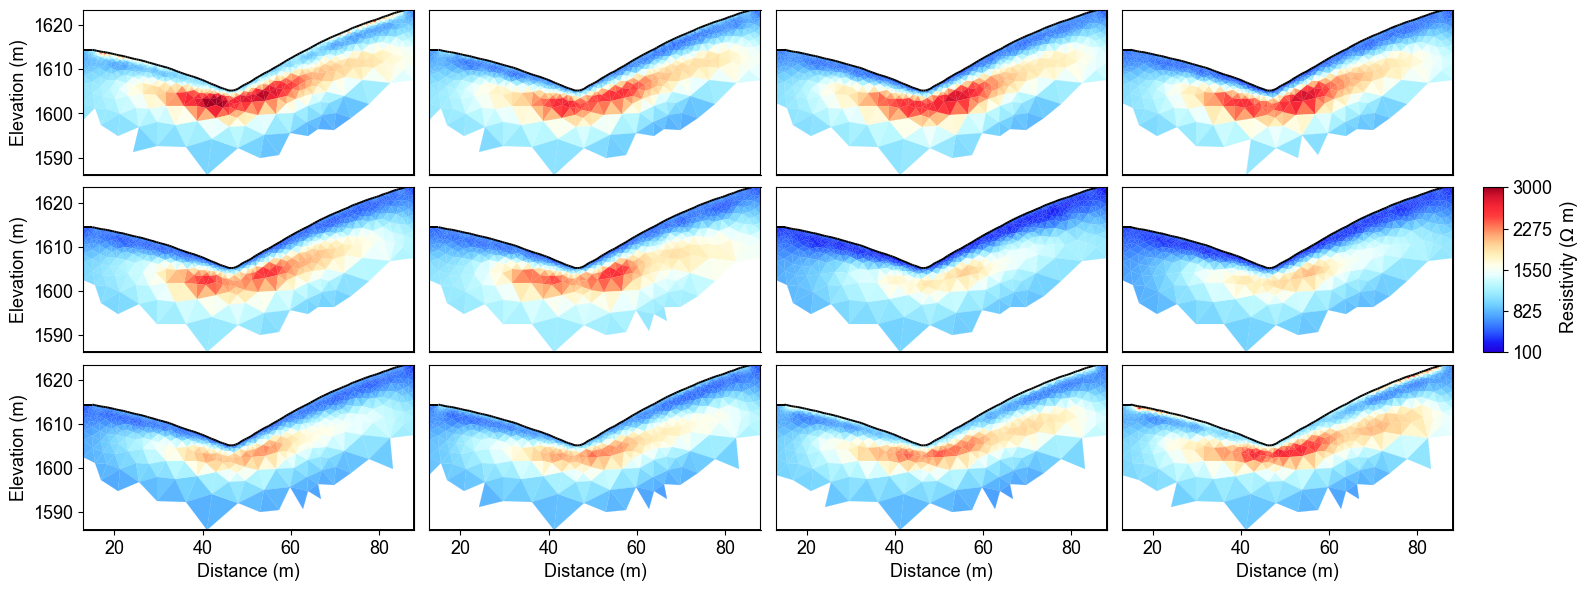

In [7]:
from palettable.lightbartlein.diverging import BlueDarkRed18_18
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pylab as pylab
params = {'legend.fontsize': 13,
          #'figure.figsize': (15, 5),
         'axes.labelsize': 13,
         'axes.titlesize':13,
         'xtick.labelsize':13,
         'ytick.labelsize':13}

pylab.rcParams.update(params)
plt.rcParams["font.family"] = "Arial"

fixed_cmap = BlueDarkRed18_18.mpl_colormap
fig = plt.figure(figsize=[16, 6])

# Use tight_layout with adjusted parameters to reduce space
plt.subplots_adjust(wspace=0.05, hspace=0.05)

# True resistivity model
for i in range(12):
    row, col = i // 4, i % 4
    ax = fig.add_subplot(3, 4, i+1)
    
    # Add common ylabel only to leftmost panels
    ylabel = "Elevation (m)" if col == 0 else None
    
    # Add resistivity label only to the middle-right panel (row 1, col 3)
    resistivity_label = ' Resistivity ($\Omega$ m)' if (i == 7) else None
    
    # Only show axis ticks on leftmost and bottom panels
    if col != 0:
        ax.set_yticks([])
    
    if row != 2:  # Not bottom row
        ax.set_xticks([])
    else:
        # Add "distance (m)" label to bottom row panels
        ax.set_xlabel("Distance (m)")
    
    # Create the plot
    ax, cbar = pg.show(result.mesh,
                      result.final_models[:,i],
                      pad=0.3,
                      orientation="vertical",
                      cMap=fixed_cmap,
                      cMin=100,
                      cMax=3000,
                      ylabel=ylabel,
                      label=resistivity_label,
                      ax=ax,
                      logScale=False,
                      coverage=result.all_coverage[i]>-1.2)
    
    # Only keep colorbar for the middle-right panel (row 1, col 3)
    # This corresponds to panel index 7 in a 0-based indexing system
    if i != 7:  # Keep only the colorbar for panel 7
        cbar.remove()

plt.tight_layout()
plt.savefig("results/TL_measurements/timelapse_ert.tiff", dpi=300, bbox_inches='tight')

## 3. Full L1 Time-lapse Inversion



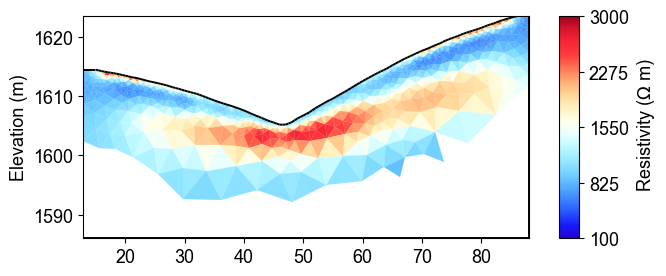

In [8]:
ax, cbar = pg.show(result.mesh,result.final_models[:,i],pad=0.3,orientation="vertical",cMap=fixed_cmap,cMin= 100,cMax = 3000
                    , ylabel="Elevation (m)",label=' Resistivity ($\Omega$ m)',logScale=False,coverage=result.all_coverage[i]>-1)

Full paths to data files



In [9]:
data_files = [os.path.join(data_dir, f) for f in ert_files]

# Measurement times (can be timestamps or any sequential numbers representing time)
measurement_times = [1, 2, 3, 4, 5, 6, 7 ,8, 9, 10, 11, 12]  # Adjust based on your actual acquisition times

# Create a mesh for the inversion (or load an existing one)
data = ert.load(data_files[0])
ert_manager = ert.ERTManager(data)
mesh = ert_manager.createMesh(data=data, quality=34)

# Set up inversion parameters
inversion_params = {
    "lambda_val": 50.0,              # Regularization parameter
    "alpha": 10.0,                   # Temporal regularization parameter
    "decay_rate": 0.0,               # Temporal decay rate
    "method": "cgls",                # Solver method ('cgls', 'lsqr', etc.)
    "model_constraints": (0.001, 1e4), # Min/max resistivity values (ohm-m)
    "max_iterations": 15,            # Maximum iterations
    "absoluteUError": 0.0,           # Absolute data error (V)
    "relativeError": 0.05,           # Relative data error (5%)
    "lambda_rate": 1.0,              # Lambda reduction rate
    "lambda_min": 1.0,               # Minimum lambda value
    "inversion_type": "L1"           # 'L1', 'L2', or 'L1L2'
}

# Create the time-lapse inversion object
inversion = TimeLapseERTInversion(
    data_files=data_files,
    measurement_times=measurement_times,
    mesh=mesh,
    **inversion_params
)

# Run the inversion
print("Starting time-lapse inversion...")
result_L1 = inversion.run()
print("Inversion complete!")

21/05/25 - 21:22:48 - pyGIMLi - INFO - Found 2 regions.


21/05/25 - 21:22:48 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


21/05/25 - 21:22:48 - pyGIMLi - INFO - Found 2 regions.


21/05/25 - 21:22:48 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


21/05/25 - 21:22:48 - pyGIMLi - INFO - Found 2 regions.


21/05/25 - 21:22:48 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


21/05/25 - 21:22:48 - pyGIMLi - INFO - Found 2 regions.


21/05/25 - 21:22:48 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


21/05/25 - 21:22:48 - pyGIMLi - INFO - Found 2 regions.


21/05/25 - 21:22:48 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


21/05/25 - 21:22:48 - pyGIMLi - INFO - Found 2 regions.


21/05/25 - 21:22:48 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


21/05/25 - 21:22:48 - pyGIMLi - INFO - Found 2 regions.


21/05/25 - 21:22:48 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


21/05/25 - 21:22:48 - pyGIMLi - INFO - Found 2 regions.


21/05/25 - 21:22:48 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


21/05/25 - 21:22:48 - pyGIMLi - INFO - Found 2 regions.


Starting time-lapse inversion...


21/05/25 - 21:22:48 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


21/05/25 - 21:22:48 - pyGIMLi - INFO - Found 2 regions.


21/05/25 - 21:22:48 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


21/05/25 - 21:22:48 - pyGIMLi - INFO - Found 2 regions.


21/05/25 - 21:22:48 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


21/05/25 - 21:22:48 - pyGIMLi - INFO - Found 2 regions.


21/05/25 - 21:22:48 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


21/05/25 - 21:22:48 - pyGIMLi - INFO - Found 2 regions.


21/05/25 - 21:22:48 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


21/05/25 - 21:22:49 - pyGIMLi - INFO - Creating forward mesh from region infos.


21/05/25 - 21:22:49 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


21/05/25 - 21:22:49 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


-6.907755278982137 9.210340371976184
------------------- IRLS Iteration: 1 ---------------------------
-------------------ERT Iteration: 0 ---------------------------


21/05/25 - 21:23:02 - pyGIMLi - INFO - Creating forward mesh from region infos.


21/05/25 - 21:23:02 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


21/05/25 - 21:23:02 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


21/05/25 - 21:23:14 - pyGIMLi - INFO - Creating forward mesh from region infos.


21/05/25 - 21:23:14 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


21/05/25 - 21:23:14 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


21/05/25 - 21:23:25 - pyGIMLi - INFO - Creating forward mesh from region infos.


21/05/25 - 21:23:25 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


21/05/25 - 21:23:25 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


21/05/25 - 21:23:38 - pyGIMLi - INFO - Creating forward mesh from region infos.


21/05/25 - 21:23:38 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


21/05/25 - 21:23:38 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


21/05/25 - 21:23:51 - pyGIMLi - INFO - Creating forward mesh from region infos.


21/05/25 - 21:23:51 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


21/05/25 - 21:23:51 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


21/05/25 - 21:24:03 - pyGIMLi - INFO - Creating forward mesh from region infos.


21/05/25 - 21:24:03 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


21/05/25 - 21:24:04 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


21/05/25 - 21:24:16 - pyGIMLi - INFO - Creating forward mesh from region infos.


21/05/25 - 21:24:16 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


21/05/25 - 21:24:16 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


21/05/25 - 21:24:29 - pyGIMLi - INFO - Creating forward mesh from region infos.


21/05/25 - 21:24:29 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


21/05/25 - 21:24:29 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


21/05/25 - 21:24:42 - pyGIMLi - INFO - Creating forward mesh from region infos.


21/05/25 - 21:24:42 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


21/05/25 - 21:24:42 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


21/05/25 - 21:24:57 - pyGIMLi - INFO - Creating forward mesh from region infos.


21/05/25 - 21:24:57 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


21/05/25 - 21:24:57 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


21/05/25 - 21:25:09 - pyGIMLi - INFO - Creating forward mesh from region infos.


21/05/25 - 21:25:10 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


21/05/25 - 21:25:10 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


ERT chi2: 2345.302026235805
dPhi: 1.0
ERTphi_d: 9774345.116330786, ERTphi_m: 0.0, ERTphi_t: 0.0


-------------------ERT Iteration: 1 ---------------------------


ERT chi2: 27.88963557432539
dPhi: 0.9881082968153624
ERTphi_d: 796718.9424242544, ERTphi_m: 17837.09544940781, ERTphi_t: 3813.0414060226885


-------------------ERT Iteration: 2 ---------------------------


ERT chi2: 6.960651007848475
dPhi: 0.7504215862090251
ERTphi_d: 349998.68220202427, ERTphi_m: 30168.91528465104, ERTphi_t: 12984.692340446201


-------------------ERT Iteration: 3 ---------------------------


ERT chi2: 3.367077914610353
dPhi: 0.5162696835664067
ERTphi_d: 247935.04573769166, ERTphi_m: 37053.548527115505, ERTphi_t: 17688.692902711926


-------------------ERT Iteration: 4 ---------------------------


ERT chi2: 2.3394167363495044
dPhi: 0.3052086124296806
ERTphi_d: 211258.75946402404, ERTphi_m: 41537.43255724559, ERTphi_t: 20109.85861437579


-------------------ERT Iteration: 5 ---------------------------


ERT chi2: 1.9348220920979535
dPhi: 0.17294680249355335
ERTphi_d: 195045.4604804089, ERTphi_m: 44513.724294829946, ERTphi_t: 21403.304689977853


-------------------ERT Iteration: 6 ---------------------------


ERT chi2: 1.7180804948161736
dPhi: 0.1120214608707326
ERTphi_d: 186092.1634805223, ERTphi_m: 46754.0176325916, ERTphi_t: 22240.857033066277


-------------------ERT Iteration: 7 ---------------------------


ERT chi2: 1.5784213938646825
dPhi: 0.08128786827676197
ERTphi_d: 180505.15021869226, ERTphi_m: 48505.12527026865, ERTphi_t: 22808.05972347758


-------------------ERT Iteration: 8 ---------------------------


ERT chi2: 1.4809779168481754
dPhi: 0.06173476702436341
ERTphi_d: 176667.18712242768, ERTphi_m: 49909.362813780535, ERTphi_t: 23213.873931160066
Convergence reached at iteration 8
------------------- IRLS Iteration: 2 ---------------------------
-------------------ERT Iteration: 0 ---------------------------


ERT chi2: 1.4809779168481754
dPhi: 1.0
ERTphi_d: 176667.18712242768, ERTphi_m: 49909.362813780535, ERTphi_t: 23213.873931160066
Convergence reached at iteration 0
IRLS relative change: 0.0
IRLS converged after 2 iterations


End of inversion
Inversion complete!


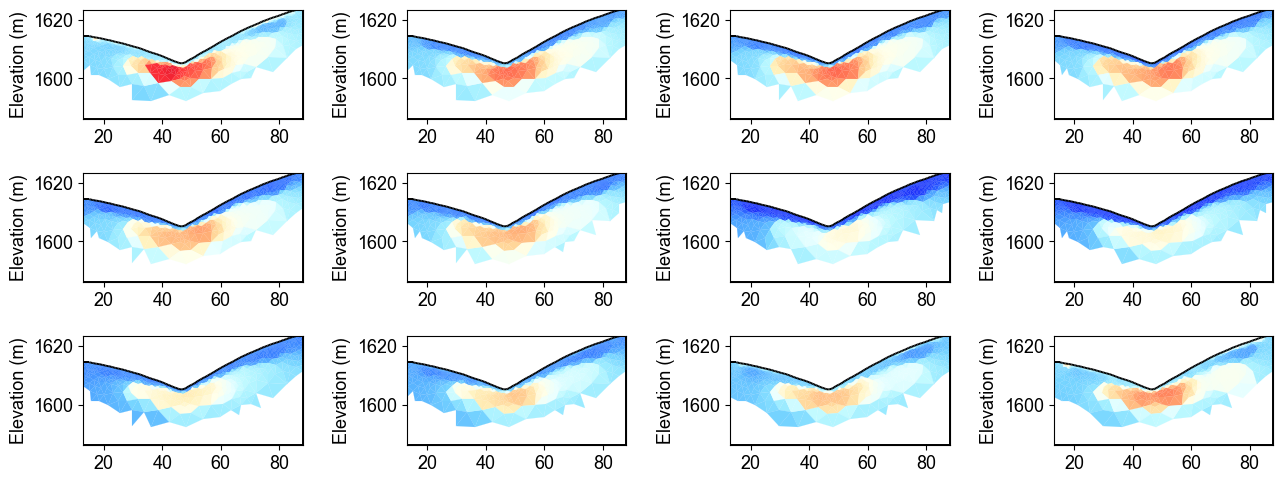

In [10]:
from palettable.lightbartlein.diverging import BlueDarkRed18_18
fixed_cmap = BlueDarkRed18_18.mpl_colormap

fig = plt.figure(figsize=[16,6])

# True resistivity model
for i in range(12):
    ax = fig.add_subplot(3,4,i+1)
    ax, cbar = pg.show(result_L1.mesh,result_L1.final_models[:,i],pad=0.3,orientation="vertical",cMap=fixed_cmap,cMin= 100,cMax = 3000
                    , ylabel="Elevation (m)",label=' Resistivity ($\Omega$ m)',ax=ax,logScale=False,coverage=result.all_coverage[i]>-1)
    cbar.remove()